# II. Congestion Prediction

### Introduction

This study aims to design a predictive model for traffic congestion using environmental and contextual data, such as weather conditions, events, and time-related variables. By accurately predicting traffic patterns, the model can optimize traffic light timings, reduce congestion, and improve overall traffic flow. It could dynamically adjust signal durations to allocate green time efficiently, minimizing delays, fuel consumption, and emissions. Additionally, integrating this model into intelligent traffic management systems could enable synchronized "green waves," reducing stops and delays across multiple intersections. This approach has the potential to enhance urban mobility, reduce disruptions during events or adverse weather, and support more efficient and sustainable transportation networks.

### Part 1: Importing The NYC Weather Data

##### Time: 05-01-2021 to 05-10-2021

##### Data Source: 

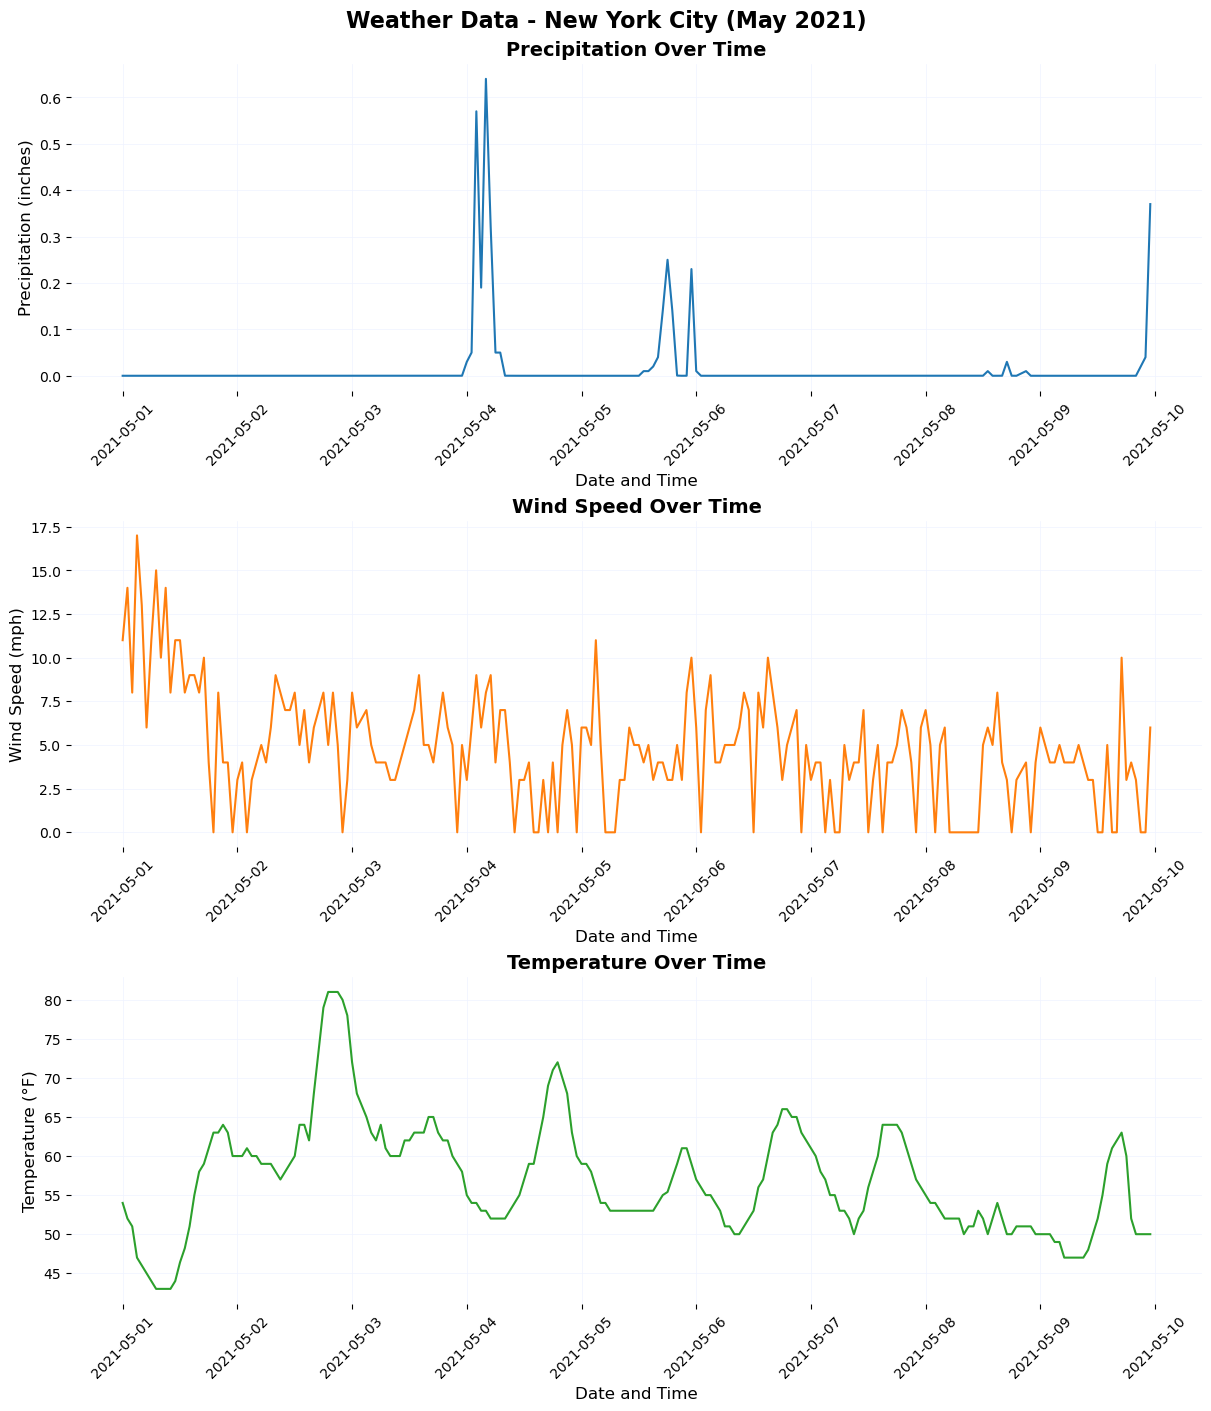

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
# Load the dataset directly from the file
weather_data = pd.read_csv("weather_Panel_NY.csv")

# Convert the 'interval60' column to datetime format
weather_data['interval60'] = pd.to_datetime(weather_data['interval60'])

# Step 2: Data Cleaning and Processing
# Replace invalid or missing temperature values (if any)
weather_data['Temperature'] = weather_data['Temperature'].apply(lambda x: 42 if x == 0 else x)

# Step 3: Define Plot Themes
def plot_theme(ax):
    """Apply a consistent theme to plots."""
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(color="#eff3ff", linestyle='-', linewidth=0.5)
    ax.set_facecolor("white")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Step 4: Create Subplots
# Create a figure with 3 subplots (one for each variable)
fig, axs = plt.subplots(3, 1, figsize=(12, 14), constrained_layout=True)

# Plot 1: Precipitation
sns.lineplot(data=weather_data, x='interval60', y='Precipitation', ax=axs[0], color='#1f77b4')
axs[0].set_title("Precipitation Over Time")
axs[0].set_xlabel("Date and Time")
axs[0].set_ylabel("Precipitation (inches)")
plot_theme(axs[0])

# Plot 2: Wind Speed
sns.lineplot(data=weather_data, x='interval60', y='Wind_Speed', ax=axs[1], color='#ff7f0e')
axs[1].set_title("Wind Speed Over Time")
axs[1].set_xlabel("Date and Time")
axs[1].set_ylabel("Wind Speed (mph)")
plot_theme(axs[1])

# Plot 3: Temperature
sns.lineplot(data=weather_data, x='interval60', y='Temperature', ax=axs[2], color='#2ca02c')
axs[2].set_title("Temperature Over Time")
axs[2].set_xlabel("Date and Time")
axs[2].set_ylabel("Temperature (°F)")
plot_theme(axs[2])

# Add a main title for the entire figure
fig.suptitle("Weather Data - New York City (May 2021)", fontsize=16, fontweight='bold')

# Step 5: Show and Save the Plot
# Display the plot
plt.show()

# Optionally save the figure as an image file
fig.savefig("weather_data_plot.png", dpi=300)



## Part 2: Exploratory Data Analysis

Traffic Count Across the Time:

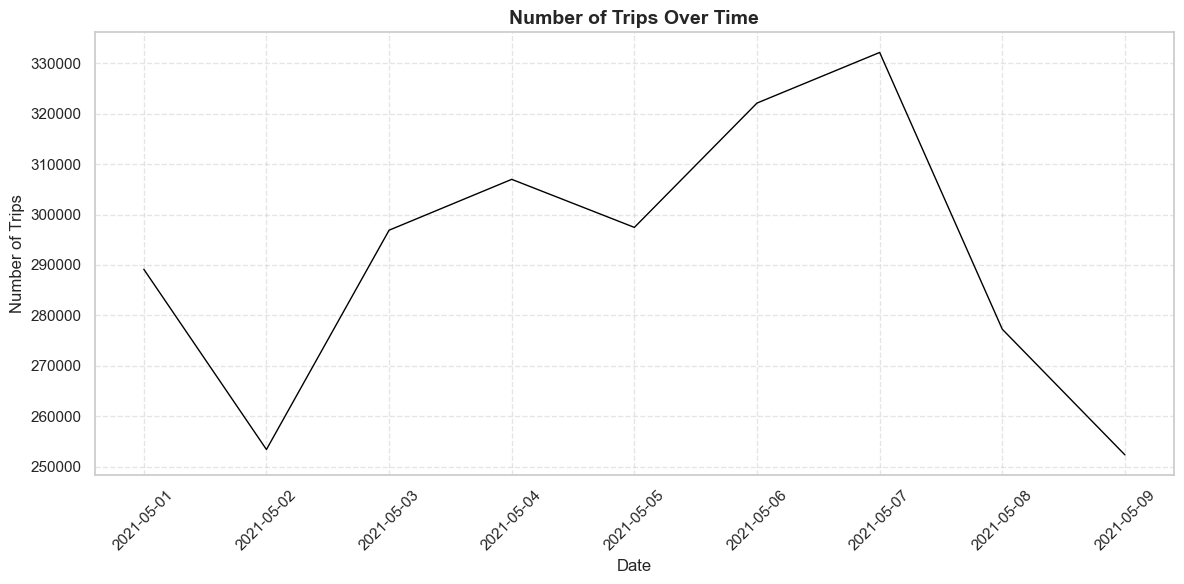

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
# Load the dataset
data = pd.read_csv("data_filtered.csv")

# Step 2: Preprocess the Data
# Extract the columns with traffic counts (time intervals)
traffic_columns = data.columns[7:]  # Assuming traffic data starts from the 8th column

# Add a new column for total traffic count per row
data['Total_Traffic'] = data[traffic_columns].sum(axis=1)

# Aggregate traffic counts by date
traffic_by_date = data.groupby("Date")['Total_Traffic'].sum().reset_index()

# Convert the 'Date' column to datetime format for proper sorting
traffic_by_date['Date'] = pd.to_datetime(traffic_by_date['Date'])

# Sort by date
traffic_by_date = traffic_by_date.sort_values(by='Date')

# Step 3: Plot the Data
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(traffic_by_date['Date'], traffic_by_date['Total_Traffic'], color='black', linewidth=1)

# Add labels and title
plt.title("Number of Trips Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


Traffic Count Comparing Weekends and Weekdays:

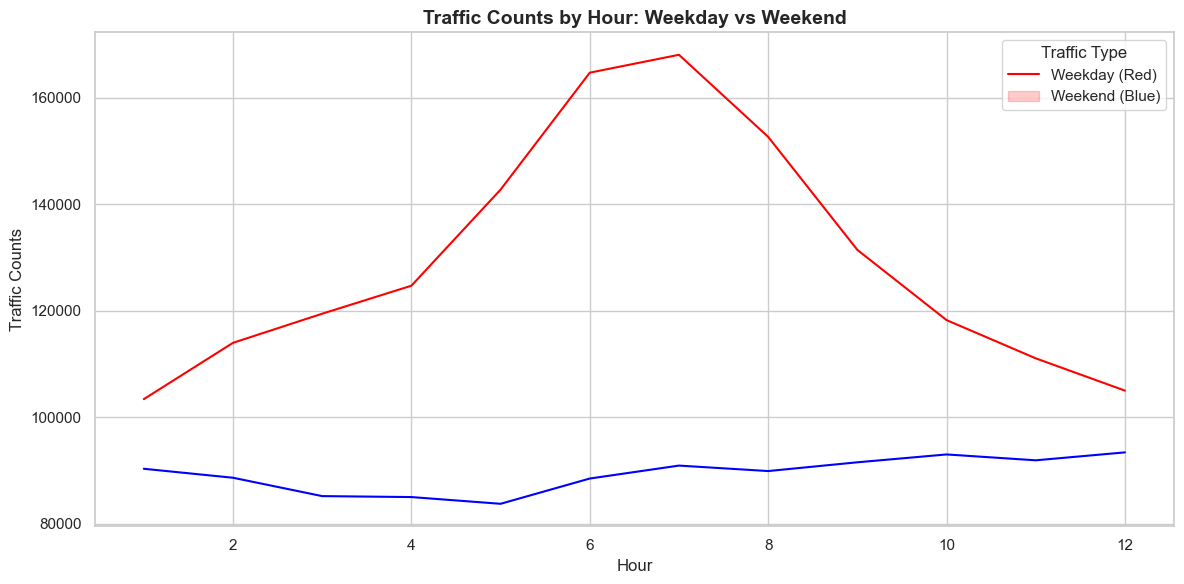

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Load the Data
data = pd.read_csv("data_filtered.csv")

# Step 2: Preprocess the Data
# Extract time interval columns
traffic_columns = data.columns[7:]  # Assuming traffic data starts from the 8th column

# Add a column for total traffic during each hour
data['Total_Traffic'] = data[traffic_columns].sum(axis=1)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add a column for the day of the week
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Add a column to classify as 'Weekday' or 'Weekend'
data['Weekend'] = data['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Melt the time interval columns into a long format
hourly_data = pd.melt(data, 
                      id_vars=['Date', 'Weekend'], 
                      value_vars=traffic_columns, 
                      var_name='Hour', 
                      value_name='Traffic_Count')

# Clean the 'Hour' column to extract hour values
hourly_data['Hour'] = hourly_data['Hour'].str.extract(r'X(\d+)\.').astype(int)

# Step 3: Aggregate the Data
# Group by hour and weekend/weekday
hourly_traffic = hourly_data.groupby(['Hour', 'Weekend'])['Traffic_Count'].sum().reset_index()

# Step 4: Plot the Data
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot the data with explicit color mapping
sns.lineplot(data=hourly_traffic, x='Hour', y='Traffic_Count', hue='Weekend', 
             palette={'Weekday': 'red', 'Weekend': 'blue'})  # Use blue for Weekend

# Add labels and title
plt.title("Traffic Counts by Hour: Weekday vs Weekend", fontsize=14, fontweight='bold')
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Traffic Counts", fontsize=12)

# Fix the legend to correctly match the colors
plt.legend(title="Traffic Type", labels=["Weekday (Red)", "Weekend (Blue)"], loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
Traffic Count Comparing Streets:

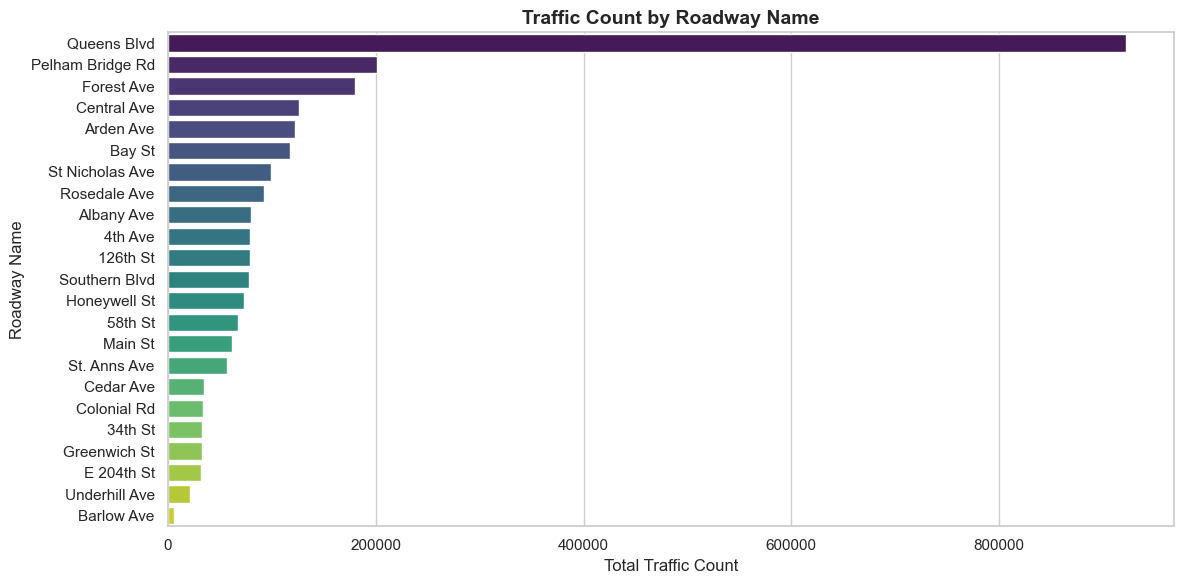

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
data = pd.read_csv("data_filtered.csv")

# Step 2: Preprocess the Data
# Extract traffic columns
traffic_columns = data.columns[7:]  # Assuming traffic data starts from the 8th column

# Add a column for total traffic across all time intervals
data['Total_Traffic'] = data[traffic_columns].sum(axis=1)

# Step 3: Aggregate Traffic by Roadway Name
traffic_by_roadway = data.groupby('Roadway.Name')['Total_Traffic'].sum().reset_index()

# Sort by total traffic in descending order for better visualization
traffic_by_roadway = traffic_by_roadway.sort_values(by='Total_Traffic', ascending=False)

# Step 4: Plot the Data
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_by_roadway, x='Total_Traffic', y='Roadway.Name', palette="viridis")

# Add labels and title
plt.title("Traffic Count by Roadway Name", fontsize=14, fontweight='bold')
plt.xlabel("Total Traffic Count", fontsize=12)
plt.ylabel("Roadway Name", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Data Processing:

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the Datasets
# Load traffic data
traffic_data = pd.read_csv("data_filtered.csv")

# Load weather data
weather_data = pd.read_csv("weather_Panel_NY.csv")

# Step 2: Preprocess the Traffic Data
# Convert 'Date' column to datetime
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

# Reshape the traffic data from wide to long format
hourly_columns = [col for col in traffic_data.columns if 'X' in col]
traffic_hourly = traffic_data.melt(
    id_vars=['Date', 'SegmentID', 'Roadway.Name', 'From', 'To', 'Direction'], 
    value_vars=hourly_columns, 
    var_name='Hour', 
    value_name='Traffic_Count'
)

# Extract the hour from the column names (e.g., "X12.00.1.00.AM" to "00:00")
traffic_hourly['Hour'] = traffic_hourly['Hour'].str.extract(r'X(\d+)').astype(int) - 1

# Combine Date and Hour into a single timestamp column
traffic_hourly['Timestamp'] = traffic_hourly['Date'] + pd.to_timedelta(traffic_hourly['Hour'], unit='h')

# Drop unnecessary columns
traffic_hourly = traffic_hourly[['Timestamp', 'Traffic_Count']]


Add the 'is_weekend' Feature

In [43]:
# Step 3: Add the 'is_weekend' Feature
# Extract day of the week from the timestamp
traffic_hourly['Day_of_Week'] = traffic_hourly['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
traffic_hourly['is_weekend'] = traffic_hourly['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 4: Preprocess the Weather Data
# Convert 'interval60' to datetime
weather_data['interval60'] = pd.to_datetime(weather_data['interval60'])

# Step 5: Merge the Datasets
# Merge traffic and weather data on the timestamp
combined_data = pd.merge(traffic_hourly, weather_data, left_on='Timestamp', right_on='interval60', how='inner')

# Drop unnecessary columns
combined_data = combined_data.drop(columns=['interval60', 'Day_of_Week'])


Add the Holiday/Event Dates Feature

In [44]:
# Step 1: Define the Holiday/Event Dates
# List of holiday or event dates
holiday_event_dates = [
    "2021-05-01",  # International Workers' Day
    "2021-05-05",  # Cinco de Mayo
    "2021-05-09"   # Mother's Day
]

# Step 2: Add the 'is_holiday_or_event' Variable
# Convert the holiday_event_dates to datetime for comparison
holiday_event_dates = pd.to_datetime(holiday_event_dates)

# Add a new column to indicate whether the date is a holiday or event
traffic_hourly['is_holiday_or_event'] = traffic_hourly['Timestamp'].dt.date.isin(holiday_event_dates.date).astype(int)


## Part 3: Data Training and Model Making

Making the model

In [45]:
# Step 3: Merge with Weather Data
# (Assume weather data preprocessing and merging steps as before)
combined_data = pd.merge(traffic_hourly, weather_data, left_on='Timestamp', right_on='interval60', how='inner')

# Step 4: Feature Selection
# Add 'is_holiday_or_event' to the features
X = combined_data[['Temperature', 'Precipitation', 'Wind_Speed', 'is_weekend', 'is_holiday_or_event']]
y = combined_data['Traffic_Count']

# Step 5: Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

from tabulate import tabulate  # Install this with `pip install tabulate`

# Step 7: Create a DataFrame to Display Actual, Predicted, MAE, and MSE for Each Row
results_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred
})

# Calculate Absolute Error and Squared Error for each row
results_df['Absolute Error'] = abs(results_df['Actual Value'] - results_df['Predicted Value'])
results_df['Squared Error'] = (results_df['Actual Value'] - results_df['Predicted Value']) ** 2

# Add columns for MAE and MSE (optional, as they are global metrics)
results_df['MAE'] = mae
results_df['MSE'] = mse

# Round values for better readability
results_df = results_df.round({'Actual Value': 2, 'Predicted Value': 2, 'Absolute Error': 2, 'Squared Error': 2, 'MAE': 2, 'MSE': 2})

# Display the table using tabulate for a clean format
table = tabulate(results_df.head(10), headers='keys', tablefmt='pretty')
print(table)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

+---+--------------+-----------------+----------------+---------------+--------+---------+
|   | Actual Value | Predicted Value | Absolute Error | Squared Error |  MAE   |   MSE   |
+---+--------------+-----------------+----------------+---------------+--------+---------+
| 0 |     52.0     |     212.31      |     160.31     |   25697.91    | 186.21 | 67145.7 |
| 1 |     3.0      |     222.72      |     219.72     |   48278.99    | 186.21 | 67145.7 |
| 2 |     23.0     |     222.72      |     199.72     |    39890.0    | 186.21 | 67145.7 |
| 3 |    119.0     |      190.6      |      71.6      |    5127.27    | 186.21 | 67145.7 |
| 4 |    534.0     |     212.31      |     321.69     |   103487.25   | 186.21 | 67145.7 |
| 5 |    724.0     |     223.89      |     500.11     |   250110.57   | 186.21 | 67145.7 |
| 6 |    192.0     |     163.73      |     28.27      |    799.45     | 186.21 | 67145.7 |
| 7 |    343.0     |     196.71      |     146.29     |   21399.55    | 186.21 | 67145.7 |

The model's performance, as reflected by the evaluation metrics, indicates significant limitations. The Mean Absolute Error (MAE) of 186.21 suggests that, on average, predictions deviate from actual values by 186 traffic counts, which may be substantial depending on the scale of traffic. The Mean Squared Error (MSE) of 67,145 highlights large errors, particularly influenced by extreme outliers, given the quadratic nature of MSE. Most concerning is the R-squared (R²) value of 0.00065, which indicates that the model explains less than 0.1% of the variance in the data, essentially performing no better than a simple mean-based prediction. This suggests the model fails to capture meaningful patterns in the data, likely due to insufficient features, inadequate complexity, or a mismatch between the data and the model's assumptions.

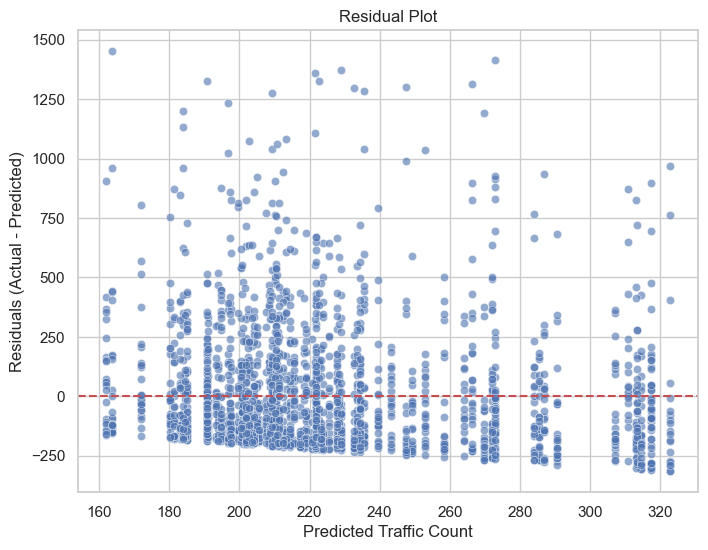

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Traffic Count")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


The residual plot indicates that the model generally performs well, with residuals centered around zero and no clear non-linear patterns, suggesting it captures the general relationship between predictors and traffic counts. However, the increasing spread of residuals with larger predicted values highlights heteroscedasticity, meaning the model's errors grow with higher traffic counts, reducing reliability for these predictions. Additionally, the presence of significant outliers (residuals exceeding 1000) suggests that the model struggles to account for unusual traffic conditions, potentially due to missing features such as accidents or events. A slight tendency to underpredict higher traffic counts is also observed, as evidenced by the clustering of residuals below zero. 

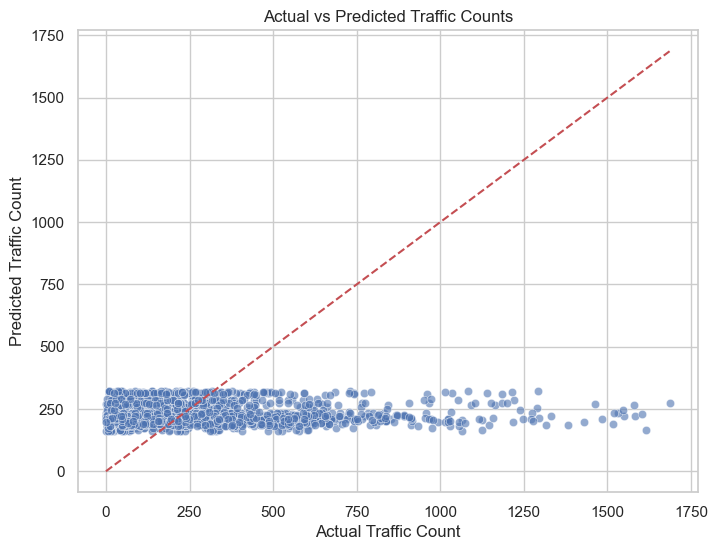

In [47]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title("Actual vs Predicted Traffic Counts")
plt.xlabel("Actual Traffic Count")
plt.ylabel("Predicted Traffic Count")
plt.show()

The scatter plot compares actual traffic counts (x-axis) to predicted traffic counts (y-axis) for a Random Forest model, with the red dashed line representing the ideal scenario where predictions perfectly match actual values. The plot reveals several key insights regarding the model's performance and limitations.

First, the majority of predicted values cluster within a narrow range (approximately 200–400), regardless of the actual traffic counts. This indicates that the model struggles to capture variability in traffic counts, particularly for higher values, leading to underprediction for actual traffic counts above 500. The lack of points along the diagonal line for larger actual counts highlights this systematic error. Additionally, the spread of points becomes more pronounced as actual traffic counts increase, reflecting heteroscedasticity, where prediction errors grow with larger traffic counts. This suggests that the model's performance deteriorates for higher traffic levels, potentially due to insufficient features to explain variability at these extremes.

The model performs reasonably well for lower traffic counts, as many predictions fall close to the diagonal line in this range. However, the consistent over-concentration of predicted values between 200 and 400 suggests that the model may be biased toward predicting average traffic counts, a limitation likely stemming from the training process or insufficient feature diversity.

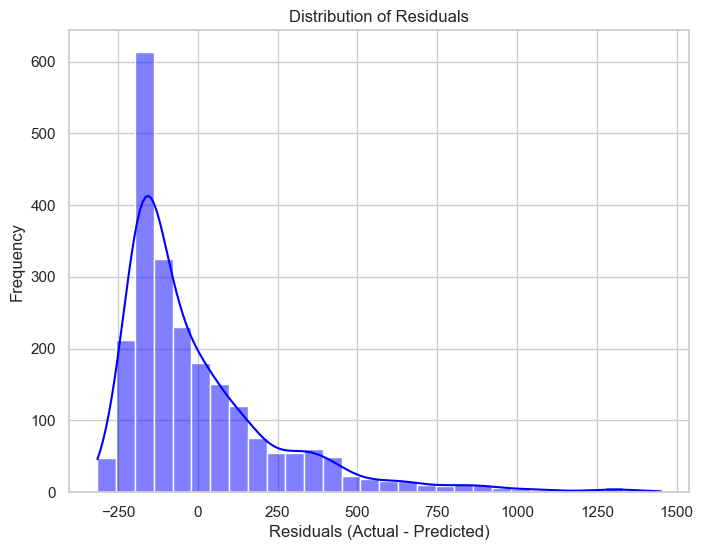

In [48]:
# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


The residual distribution is right-skewed, with most residuals concentrated between -250 and 250, indicating that the Random Forest model performs reasonably well for the majority of predictions. However, the long positive tail reveals significant underprediction for higher traffic counts, suggesting the model struggles with variability in extreme conditions. This aligns with earlier observations of heteroscedasticity, where prediction errors increase with larger traffic counts. Additionally, extreme residuals exceeding 1000 indicate outliers or unaccounted factors, such as events or anomalies. To improve, consider applying a log transformation to stabilize variance, adding relevant features (e.g., time, weather), and exploring advanced models like Gradient Boosting to better capture complex patterns.